#### dcd_ch4_hw

# Homework for Chapter 4


In [21]:
#from math import exp
import matplotlib.pyplot as plt
import numpy as np
from PSP_heat_Cole import *
from PSP_thermalCond import *
from PSP_soil import *
from math import *
from PSP_heatSoil import*
from __future__ import division
from PSP_readDataFile import *
import PSP_grid as grid
from PSP_ThomasAlgorithm import *

## Problem 1

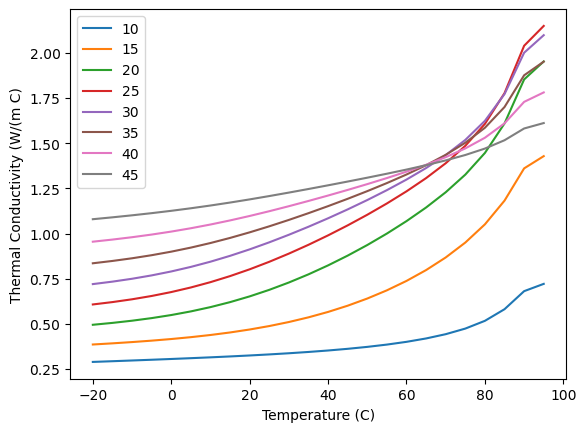

In [22]:
bulkDensity=1300
waterContent=range(10,50,5)
clay=.4
temperature = range(-20,100,5)
ypoints = []
theta_points = []
for y in waterContent:
    ypoints.append(y)
    xpoints =[]
    K_therm = []
    for x in temperature:
        K= thermalConductivity(bulkDensity, y/100 , clay, x)
        xpoints.append(x)
        K_therm.append(K)
    plt.plot(xpoints,K_therm,label = str(y))
plt.xlabel('Temperature (C)')
plt.ylabel('Thermal Conductivity (W/(m C)')
plt.legend((ypoints))

**At what temp is the K of wet soil independent of water content? Why?**

Through the investigation I conducted it would appear that for a wet soil that was 40% clay with a bulk density of $1.3 g cm^{-3}$ that the themal conductivity (K) becomes independent of water content around 70 &deg;C as that is where the differnt plots of K by water content begin to merge or at the very least cross. I believe this is caused by the laws used in the justification of the 1994 Campbell model. This model is based on the idea that the thermal conductivity of the soil is a weighted average of its constiiuent parts. So when the soil gets to roughly 70 &deg;C the conductivity of the soil gas, which is temperature dependent, becomes equivelent to or greater than the thermal conductivity of the soil water.

## Problem 2

In [23]:
theta=range(10,50,5)
bulk=range(1000,1500,50)
C_h = []
for x in bulk:
    for y in theta:
        C = heatCapacity(x,y/100)
        C_h.append(C)
max_C = max(C_h)/(10**6)
min_C = min(C_h)/(10**6)
print('maximum', max_C)
print('minimum', min_C)

maximum 3.1942075471698113
minimum 1.3236603773584905


**What is ths possible range of the specific heat in soil** (had 2 and 4 done but it deleted me back to this checkpiont so thats fun haha)

Since themal diffusivity is considered the conductivity over the specific heat the numerical range for specific heat could be any positive value. However the realistic answer would be that soils will only exhibit a volumetric heat capacity rougly between air ($0.00013 MJ m^{-3} K^{-1}$ ) and Water ($4.18 MJ m^{-3} K^{-1}$) with an average value close to that of mineral soils ($2.31 MJ m^{-3} K^{-1}$). We can simulate this further though with the help of the computer program above and find that a lower bound of $1.3 MJ m^{-3} K^{-1}$ and upper bound of $3.2 MJ m^{-3} K^{-1}$ are reasonable estimations of the volumetric heat capacitys for soils. 

$$ 1.3 MJ m^{-3} K^{-1} < C_h < 3.2 MJ m^{-3} K^{-1} $$

note: tried to call the actuall value using this syntax but I believe it does not support putting numbers in the text via this method 

$$ {{ max_C[0] }}$$

# Problem 3 
**predict temp as a function of time and depth**


In [24]:
T_0=20
thetaIni=0.5
solver= 'CELL_CENT_FIN_VOL'

initials = initialize(T_0, thetaIni, solver)
cellCentFiniteVol(airT, initials, dt)

<class 'NameError'>: name 'airT' is not defined

**how would residue effect soil temp**

**at what depth is the sine wave 180 degrees out of phase with the surface** (trough peak overlap)


# Problem 4 
**make PSP_heat change water content with depth**

# Problem 5

Temperatures =  [20.3, 20.4, 19.8, 18.0]


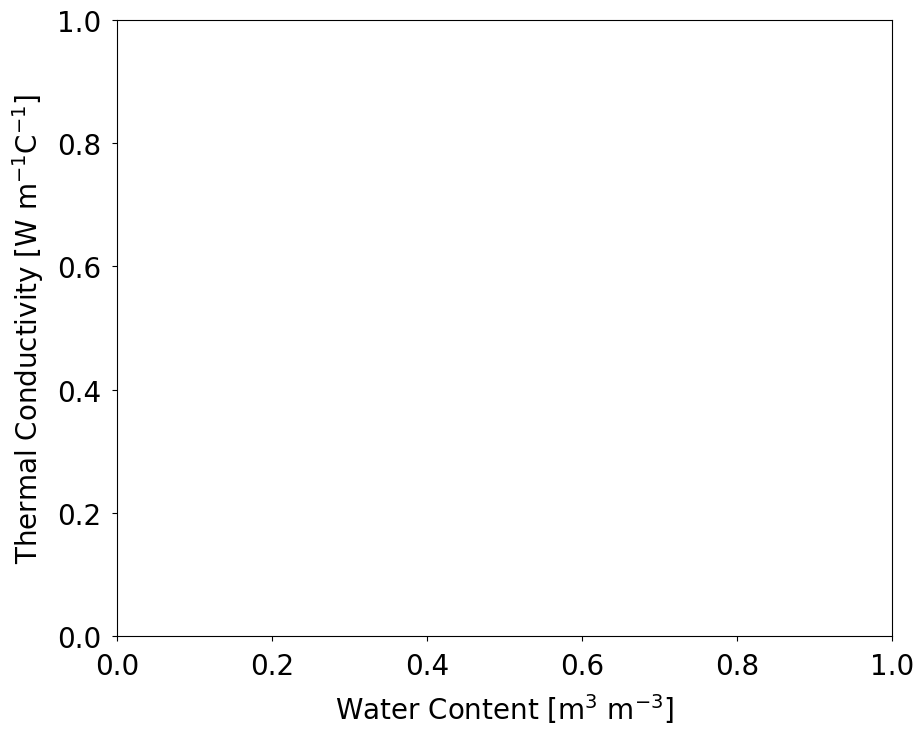

<class 'TypeError'>: 'numpy.ndarray' object is not callable

In [25]:
bulkDensity = 1300 # "bulk density [kg/m^3]: "
clay = 0.5 # "clay [0 - 1]: "

A, isFileOk = readDataFile("soilTemperatures_hours.csv", 1, ',', False)

soilTemperature = [A[0][1],A[0][2],A[0][3],A[0][4]] #10 25 70 135 cm
print ("Temperatures = ", soilTemperature)
nrTemperatures = len(soilTemperature)

particleDensity = 2650
porosity = 1 - (bulkDensity / particleDensity) 

step = 0.02  
nrValues = int(porosity / step) + 1
waterContent = np.zeros(nrValues)
thermalConductivity = np.zeros(nrValues)  
for i in range(nrValues):
    waterContent[i] = step*i


fig = plt.figure(figsize=(10,8))
plt.xlabel('Water Content [m$^{3}$ m$^{-3}$]',fontsize=20,labelpad=8)
plt.ylabel('Thermal Conductivity [W m$^{-1}$C$^{-1}$]',fontsize=20,labelpad=8)
plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
#plt.xlim(0, 0.7)
for t in range(nrTemperatures):
    for i in range(nrValues):
        thermalConductivity[i] = thermalConductivity(bulkDensity, 
                                waterContent[i], clay, soilTemperature[t])
    if (t == 0): plt.plot(waterContent, thermalConductivity,'k')  
    if (t == 1): plt.plot(waterContent, thermalConductivity,'--k')   
    if (t == 2): plt.plot(waterContent, thermalConductivity,'-.k') 
    if (t == 3): plt.plot(waterContent, thermalConductivity,':k')
plt.show() 

In [26]:
print (A)

[[1.0000e+00 2.0300e+01 2.0400e+01 1.9800e+01 1.8000e+01]
 [2.0000e+00 2.0300e+01 2.0500e+01 1.9800e+01 1.8100e+01]
 [3.0000e+00 2.0300e+01 2.0400e+01 1.9700e+01 1.8000e+01]
 ...
 [1.2221e+04 4.5000e+00 4.6000e+00 6.2000e+00 8.3000e+00]
 [1.2222e+04 4.7000e+00 4.5000e+00 6.2000e+00 8.3000e+00]
 [1.2223e+04 4.7000e+00 4.6000e+00 6.2000e+00 8.3000e+00]]


# Problem 6

**modify clay and bulk of soil.py and investigate the effect of these variables on soil temp at 3 textures and 2 densiies**

# Problem 7
**modify PSP Heat investigate the effects of the 3 types of solutions**
